In [213]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
from torch.optim import lr_scheduler

from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import imageio
from torch.nn import functional as F

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
image_path = '/content/drive/MyDrive/DL/Datasets/images_mnist_gray.npy'

images= np.load(image_path)

In [217]:
print("shape of loaded array: ", images.shape)

shape of loaded array:  (28000, 28, 28)


##Visualizing some Images

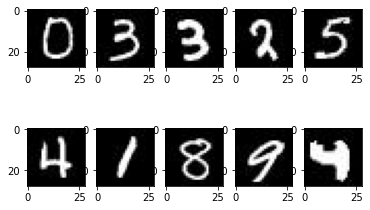

In [218]:
plt.figure(1)
plt.subplot(2,5,1)
plt.imshow(images[15], cmap= 'gray')
plt.subplot(2,5,2)
plt.imshow(images[16], cmap= 'gray')
plt.subplot(2,5,3)
plt.imshow(images[100], cmap= 'gray')
plt.subplot(2,5,4)
plt.imshow(images[200], cmap= 'gray')
plt.subplot(2,5,5)
plt.imshow(images[300], cmap= 'gray')
plt.subplot(2,5,6)
plt.imshow(images[400], cmap= 'gray')
plt.subplot(2,5,7)
plt.imshow(images[500], cmap= 'gray')
plt.subplot(2,5,8)
plt.imshow(images[600], cmap= 'gray')
plt.subplot(2,5,9)
plt.imshow(images[700], cmap= 'gray')
plt.subplot(2,5,10)
plt.imshow(images[800], cmap= 'gray')
plt.show()

##Doing some data pre processing

In [219]:
#Checking if gpu is available
if torch.cuda.is_available():
  print("cuda GPU is available")
  DEVICE = 'cuda'
else:
  print("GPU is not available")
  DEVICE = 'cpu'

cuda GPU is available


In [220]:
images = np.array(images, dtype= np.float32)
images = (images - np.mean(images))/ np.std(images)

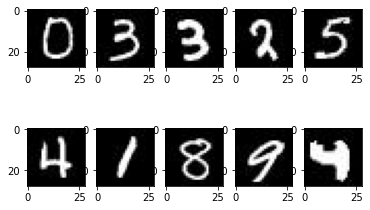

In [221]:
plt.figure(1)
plt.subplot(2,5,1)
plt.imshow(images[15], cmap= 'gray')
plt.subplot(2,5,2)
plt.imshow(images[16], cmap= 'gray')
plt.subplot(2,5,3)
plt.imshow(images[100], cmap= 'gray')
plt.subplot(2,5,4)
plt.imshow(images[200], cmap= 'gray')
plt.subplot(2,5,5)
plt.imshow(images[300], cmap= 'gray')
plt.subplot(2,5,6)
plt.imshow(images[400], cmap= 'gray')
plt.subplot(2,5,7)
plt.imshow(images[500], cmap= 'gray')
plt.subplot(2,5,8)
plt.imshow(images[600], cmap= 'gray')
plt.subplot(2,5,9)
plt.imshow(images[700], cmap= 'gray')
plt.subplot(2,5,10)
plt.imshow(images[800], cmap= 'gray')
plt.show()

In [222]:
#Moving images to DEVICE
images = torch.tensor(images, device= DEVICE)
print(images.dtype)

torch.float32


In [223]:
images_vec = images.reshape(images.shape[0], -1)
print("shape of image after flattening them: ", images_vec.shape)

shape of image after flattening them:  torch.Size([28000, 784])


#Creating Network Architecture

In [380]:
#Descriminator:

class Descriminator(nn.Module):

  def __init__(self,input_dims):     #Features is the dimension of Height and Width of the image
    super(Descriminator, self).__init__()

    self.network = nn.Sequential(
            nn.Linear(input_dims, 500), 
            nn.LeakyReLU(0.01),
            nn.Linear(500, 50),
            nn.LeakyReLU(0.01),
            nn.Linear(50, 1),
            nn.Sigmoid()
        )
    
  def forward(self, input):   #input has shape(N, 784)
    out = self.network(input)
    return out



In [381]:
#Generator:
class Generator(nn.Module):

  def __init__(self,input_dims, noise_dims):     
    super(Generator, self).__init__()

    self.network = nn.Sequential(
            nn.Linear(noise_dims, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100,500 ),
            nn.ReLU(inplace=True),
            nn.Linear(500, input_dims)
        )
    
  def forward(self, input):   #input has shape(N, 784)
    out = self.network(input)
    return out

In [382]:
des = Descriminator(images.shape[2]**2).to(device= DEVICE)

In [383]:
gen = Generator(input_dims=images.shape[2]**2 , noise_dims = 5).to(device= DEVICE)

#Training the network

In [384]:
#optimzer for descriminator network. this will update the weights of the descriminator network:
optimizer_discriminator = torch.optim.Adam(des.parameters(), lr=0.0001)        #update the weights of the network Descriminator
loss_type = nn.BCELoss()
step_lr1 = lr_scheduler.StepLR(optimizer_discriminator, step_size= 5000, gamma = 0.5)  

In [385]:
#optimzer for Generator network. this will update the weights of the Generator network:
optimizer_Generator = torch.optim.Adam(gen.parameters(), lr=0.0001)        #update the weights of the network Generator
loss_type = nn.BCELoss()
step_lr2 = lr_scheduler.StepLR(optimizer_Generator, step_size= 5000, gamma = 0.5)  

iter  0  losses:  1.4609684944152832 0.4631495177745819


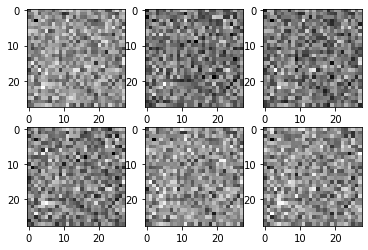

iter  500  losses:  1.102461338043213 0.6382635831832886


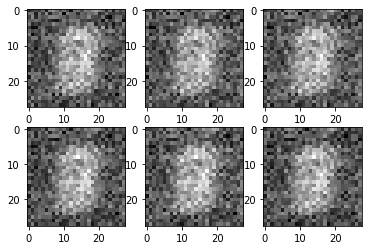

iter  1000  losses:  1.0298042297363281 0.6788251399993896


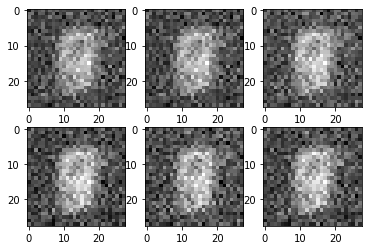

iter  1500  losses:  1.010343313217163 0.6904821991920471


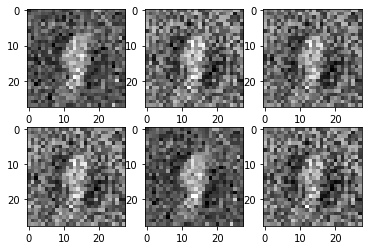

iter  2000  losses:  1.0079259872436523 0.6921074390411377


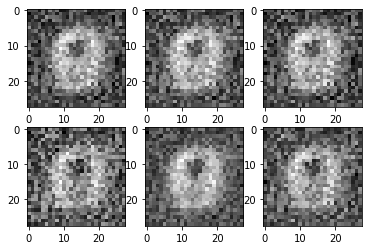

iter  2500  losses:  1.007365107536316 0.6924211382865906


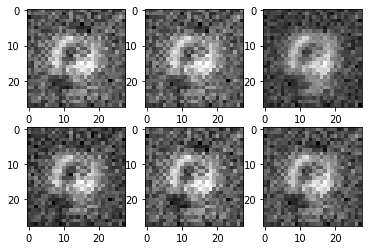

iter  3000  losses:  1.0082542896270752 0.6925862431526184


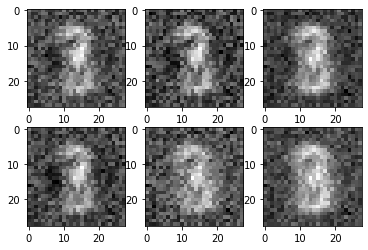

iter  3500  losses:  1.0081180334091187 0.6927732229232788


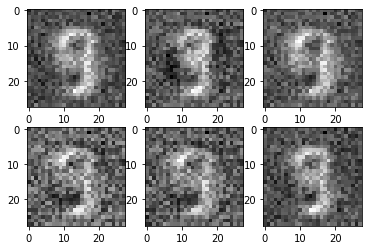

iter  4000  losses:  1.006758689880371 0.6930834650993347


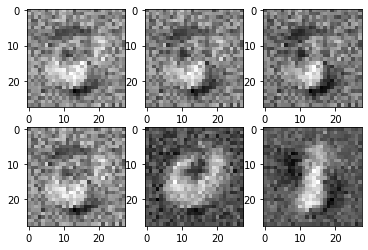

iter  4500  losses:  1.0067075490951538 0.6929258704185486


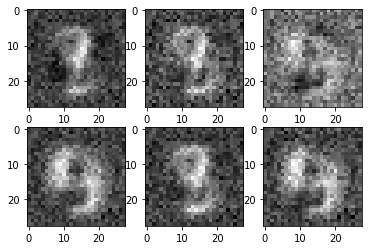

iter  5000  losses:  1.0079681873321533 0.6920753121376038


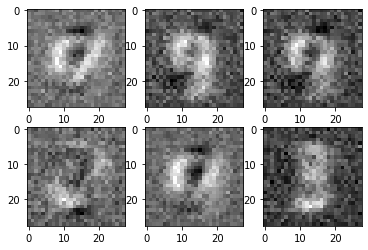

iter  5500  losses:  1.0066641569137573 0.6929914951324463


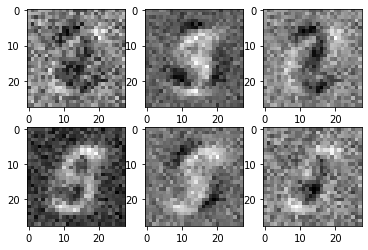

iter  6000  losses:  1.0068711042404175 0.6928613781929016


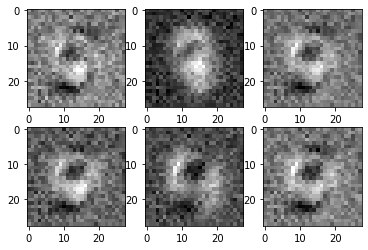

iter  6500  losses:  1.0068556070327759 0.6929332613945007


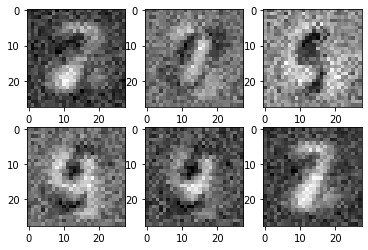

iter  7000  losses:  1.0066521167755127 0.6931048631668091


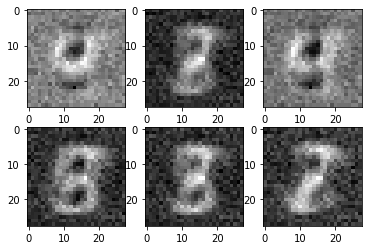

iter  7500  losses:  1.0066049098968506 0.6930951476097107


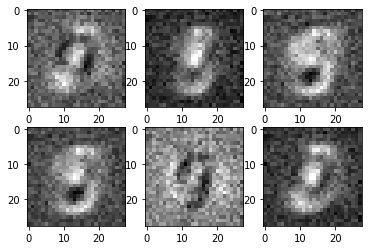

iter  8000  losses:  1.0069730281829834 0.6930754780769348


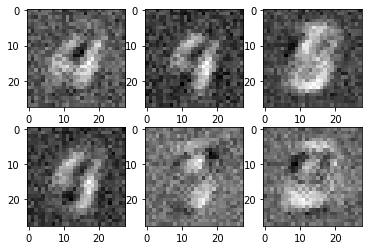

iter  8500  losses:  1.0069668292999268 0.6931410431861877


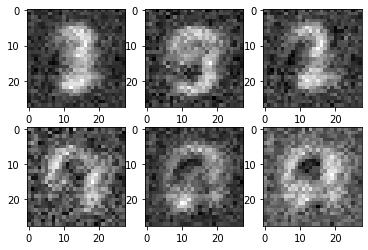

iter  9000  losses:  1.0065410137176514 0.693132758140564


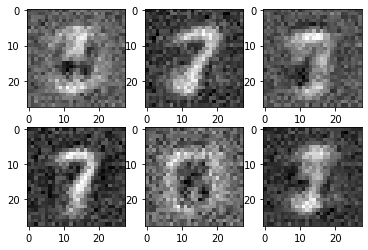

iter  9500  losses:  1.0078058242797852 0.6931133270263672


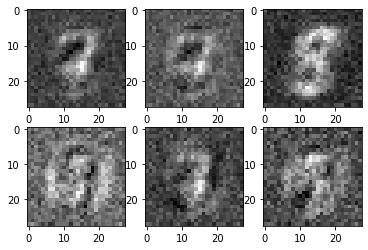

iter  10000  losses:  1.0069351196289062 0.6931301355361938


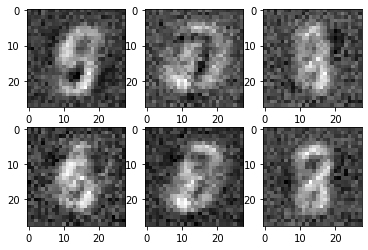

iter  10500  losses:  1.0076388120651245 0.692878007888794


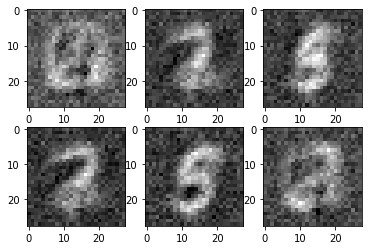

iter  11000  losses:  1.0069843530654907 0.6927070617675781


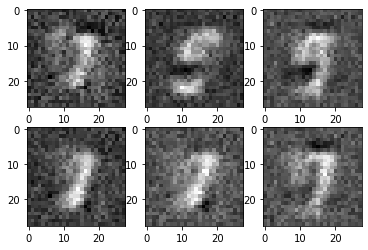

iter  11500  losses:  1.0066808462142944 0.693021297454834


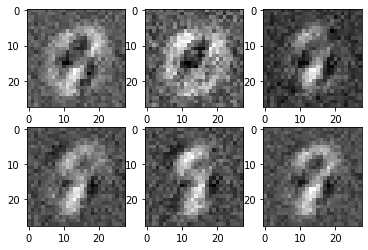

iter  12000  losses:  1.0081223249435425 0.6930316686630249


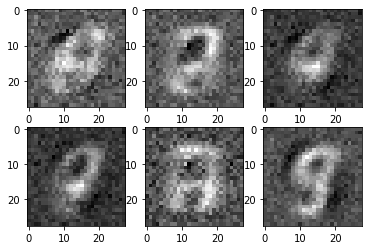

iter  12500  losses:  1.0066485404968262 0.6929855346679688


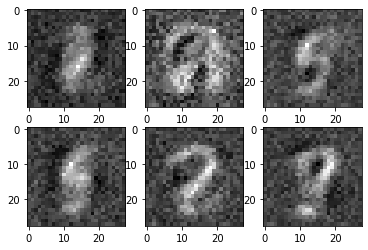

iter  13000  losses:  1.0073680877685547 0.6930305361747742


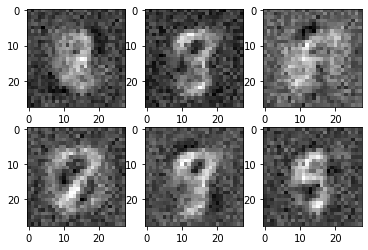

iter  13500  losses:  1.0070958137512207 0.6931172013282776


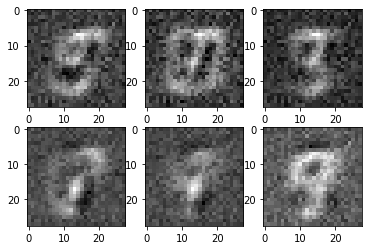

iter  14000  losses:  1.0065172910690308 0.6930797696113586


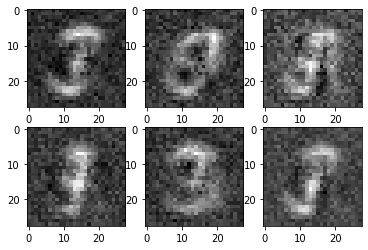

iter  14500  losses:  1.0072221755981445 0.6928128004074097


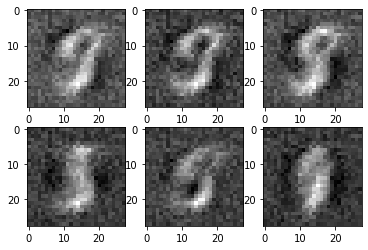

iter  15000  losses:  1.008112907409668 0.6930046081542969


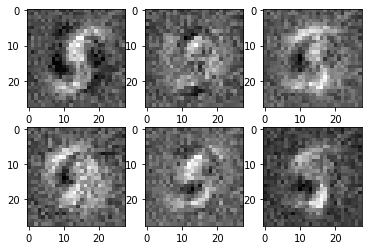

iter  15500  losses:  1.0069242715835571 0.6929264068603516


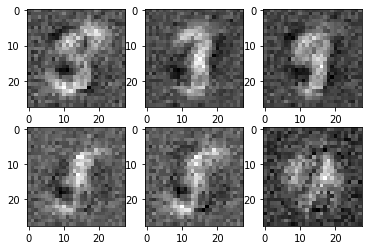

iter  16000  losses:  1.0088388919830322 0.6929387450218201


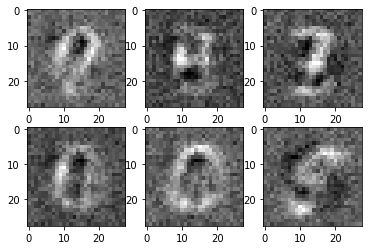

iter  16500  losses:  1.0125062465667725 0.6929502487182617


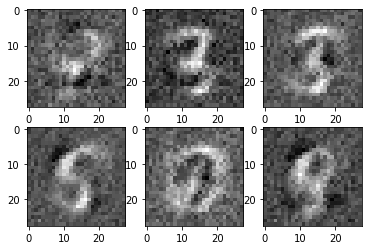

iter  17000  losses:  1.006798267364502 0.6928867101669312


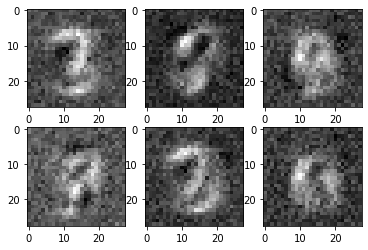

iter  17500  losses:  1.0085768699645996 0.6926676630973816


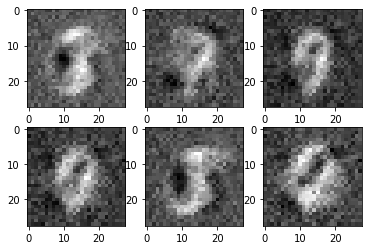

iter  18000  losses:  1.007277488708496 0.6930119395256042


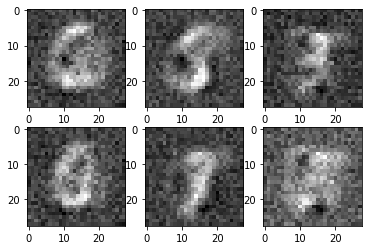

iter  18500  losses:  1.008129596710205 0.6929599046707153


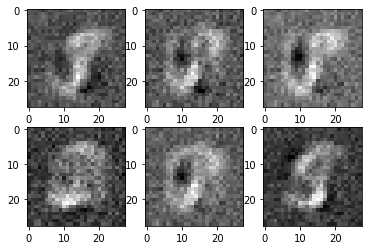

iter  19000  losses:  1.0079865455627441 0.6926305294036865


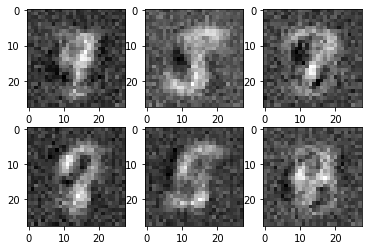

iter  19500  losses:  1.0077567100524902 0.692974328994751


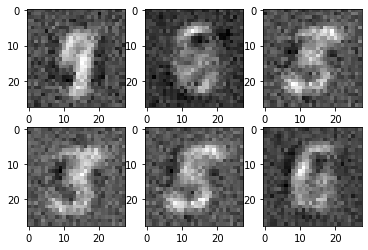

In [386]:
#Model Training
lossf_graph = []
lossg_graph = []
num_epochs = 20000
num_train = images_vec.shape[0]
batch_size = 250
noise_dims = 5
des.train()
gen.train()
for i in range(num_epochs):
  random_no = torch.randint(0, num_train, (batch_size,))
  x_batch = images_vec[random_no]

  optimizer_discriminator.zero_grad()
  desout = des(x_batch )
  noise = -2 * torch.rand((batch_size, noise_dims), device= DEVICE) + 1
  genout = gen(noise)
  finalout = des(genout)
  finalout = finalout.reshape(-1)
  desout = desout.reshape(-1)


  #Descriminator Loss:
  rl = torch.ones_like(desout)
  loss1 = F.binary_cross_entropy_with_logits(desout, rl)
  fl = torch.zeros_like(finalout)
  loss2 = F.binary_cross_entropy_with_logits(finalout, fl)
  lossf = loss1 + loss2

  #Update the parameters of descriminator:
  lossf.backward()
  optimizer_discriminator.step()

  optimizer_Generator.zero_grad()
  noise = -2 * torch.rand((batch_size, noise_dims), device= DEVICE) + 1
  outgen = gen(noise)
  outdes = des(outgen)
  outdes = outdes.reshape(-1)

  #Generator Loss
  fl = torch.ones_like(outdes)
  lossg = F.binary_cross_entropy_with_logits(outdes, fl)

  #Update the parameters of generator:
  lossg.backward()
  optimizer_Generator.step()

  #schedular step
  step_lr1.step()
  step_lr2.step()

  lossf_graph.append(lossf.cpu().item())
  lossg_graph.append(lossg.cpu().item())
  if i%500==0:
    """print("Epoch: ", i+1, ", lossf is: ", lossf.cpu().item())
    print("Epoch: ", i+1, ", lossg is: ", lossg.cpu().item())
    print("----------------------------------")
    #print("Learning rate is: ", optimizer.state_dict()['param_groups'][0]['lr'])"""
    print("iter ", i, " losses: ",lossf.cpu().item(), lossg.cpu().item() )
    plt.subplot(231)
    plt.imshow(outgen[1].reshape(28,28).detach().cpu().numpy(), cmap= 'gray')
    plt.subplot(232)
    plt.imshow(outgen[10].reshape(28,28).detach().cpu().numpy(), cmap= 'gray')
    plt.subplot(233)
    plt.imshow(outgen[50].reshape(28,28).detach().cpu().numpy(), cmap= 'gray')
    plt.subplot(234)
    plt.imshow(outgen[55].reshape(28,28).detach().cpu().numpy(), cmap= 'gray')
    plt.subplot(235)
    plt.imshow(outgen[65].reshape(28,28).detach().cpu().numpy(), cmap= 'gray')
    plt.subplot(236)
    plt.imshow(outgen[40].reshape(28,28).detach().cpu().numpy(), cmap= 'gray')
    plt.show()

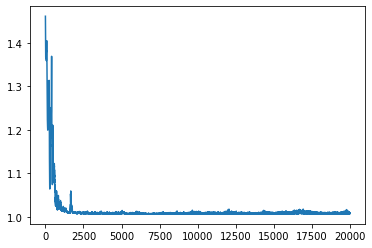

In [387]:
#Loss Curve
plt.plot(lossf_graph)
plt.show()

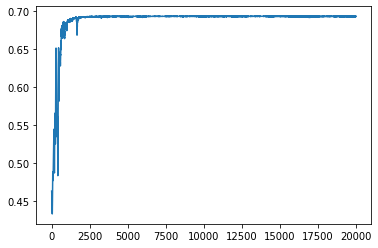

In [388]:
#Loss Curve
plt.plot(lossg_graph)
plt.show()